# Analyzing movie reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
%matplotlib inline
movies = pd.read_csv('fandango_score_comparison.csv')

In [2]:
movies.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

### Analyzing Metacritic and Fandango

(array([ 12.,   0.,  27.,   0.,   0.,  41.,   0.,  55.,   0.,  11.]),
 array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 10 Patch objects>)

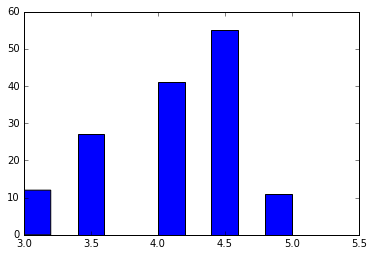

In [4]:
plt.hist(movies['Fandango_Stars'])

(array([  1.,   2.,  20.,  14.,   0.,  22.,  27.,  20.,  25.,  15.]),
 array([ 0.5,  0.9,  1.3,  1.7,  2.1,  2.5,  2.9,  3.3,  3.7,  4.1,  4.5]),
 <a list of 10 Patch objects>)

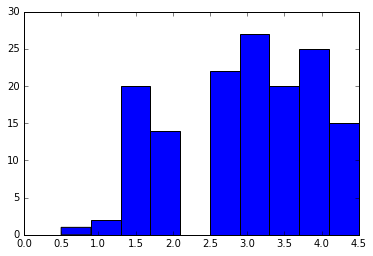

In [5]:
plt.hist(movies["Metacritic_norm_round"])

Observations:
There are no values below than 3 for the ratings of Fandango. Also majority of fandango ratings are around 4 and 4.5 where as majotity of Metacritic rating are around 3 and 3.5

In [7]:
fandango_mean = np.mean(movies['Fandango_Stars'])
metacritic_mean = np.mean(movies["Metacritic_norm_round"])
fandango_median = np.median(movies['Fandango_Stars'])
metacritic_median = np.median(movies["Metacritic_norm_round"])
fandango_std = np.std(movies['Fandango_Stars'])
metacritic_std = np.std(movies["Metacritic_norm_round"])
print('Fandango mean:', fandango_mean)
print('Metatric mean:' ,metacritic_mean)
print('Fandango median:',fandango_median)
print('Metatric median:',metacritic_median)
print('Fandango std',fandango_std)
print('Metatric std:',metacritic_std)

Fandango mean: 4.08904109589
Metatric mean: 2.97260273973
Fandango median: 4.0
Metatric median: 3.0
Fandango std 0.53853216127
Metatric std: 0.987561029704


Observations:

The median of Metacritic is higher than mean as there are few small values
which are dragging it down. 
Similarly median of Fandango is lower than mean as there are few high 
values that are pulling it up.

The range of values of for fandango are between 3 and 5 mostly 
clustered around 4 whereas the range of values for metacritic are between 
0.5 and 4.5 mostly clustered 3. Since the range is higher for metacritics, 
the standard deviation for metacritics is higher than fandango.
The possible explanation for the difference in range may be due to the
influence of movie studios and fans on fandango ratings.


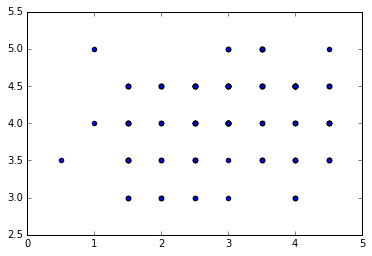

In [5]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

Several movies appear to have low ratings in Metacritic and high ratings in Fandango, or vice versa. To explore this further we can use the differences between the columns as shown below.

In [8]:
movies['fm_diff'] = abs(movies['Metacritic_norm_round'] - movies['Fandango_Stars'])
movies.sort(columns = 'fm_diff', inplace = True, ascending = False)
movies.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [9]:
r, p_value = pearsonr(movies['Metacritic_norm_round'],movies['Fandango_Stars'])
print(r)

0.178449190739


The low r value indicates the fandango and metacritic values are hardly 
correlated. It implies that both columns inflate scores overall, and the
inflation of scores happens differently depending on the movie.

In [10]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, stderr_slope = linregress(movies['Metacritic_norm_round'],movies['Fandango_Stars'])

def pred(x):
    y = (slope*x) + intercept
    return(y)
op = pred(3)
print(op)

4.09170715282


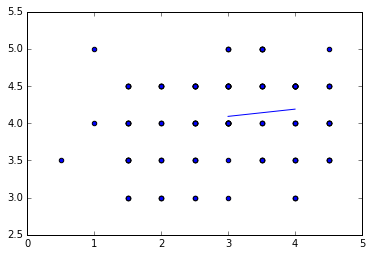

In [10]:
x = [3,4]
y = [pred(i) for i in x]
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot(x,y)
plt.show()


### Analyzing rest of the columns using r statistic

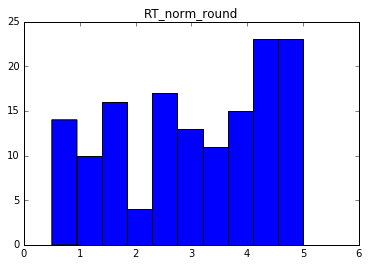

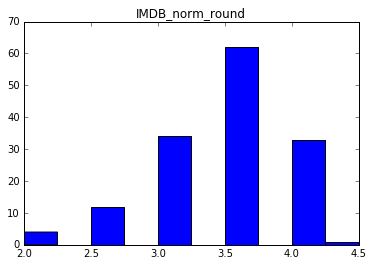

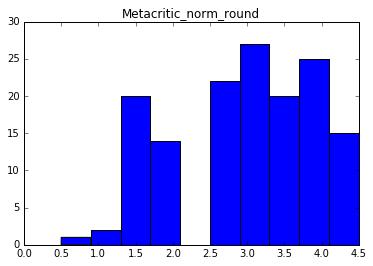

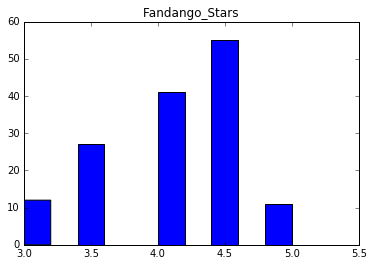

In [32]:
cols = ['RT_norm_round','IMDB_norm_round','Metacritic_norm_round','Fandango_Stars']
for col in cols:
    plt.hist(movies[col])
    plt.title(col)
    plt.show()

In [30]:
import itertools
r_values = {}
for col_a, col_b in itertools.combinations(cols,2):
    r_values[col_a + ' vs ' + col_b] = pearsonr(movies[col_a],movies[col_b])
r_values

{'IMDB_norm_round vs Fandango_Stars': (0.56627271692521819,
  9.396043964549354e-14),
 'IMDB_norm_round vs Metacritic_norm_round': (0.69239971524852106,
  3.679016437792614e-22),
 'Metacritic_norm_round vs Fandango_Stars': (0.17844919073895918,
  0.031161516228523815),
 'RT_norm_round vs Fandango_Stars': (0.30042744712335784,
  0.00022927718875066634),
 'RT_norm_round vs IMDB_norm_round': (0.74390025932619297,
  5.5352531827171736e-27),
 'RT_norm_round vs Metacritic_norm_round': (0.9466002019530928,
  1.1383429050753865e-72)}

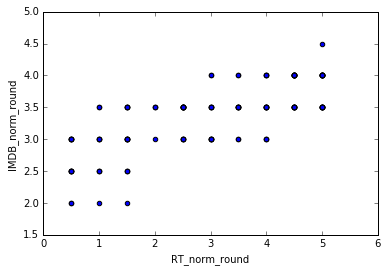

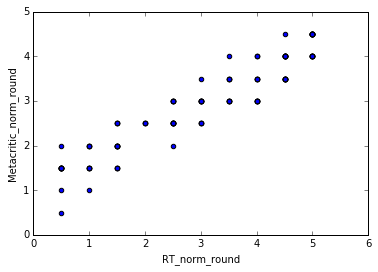

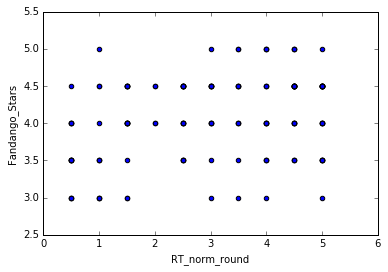

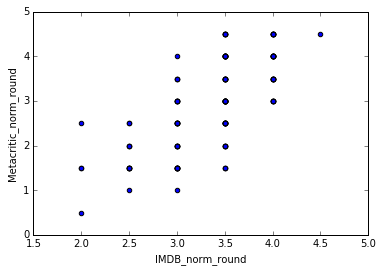

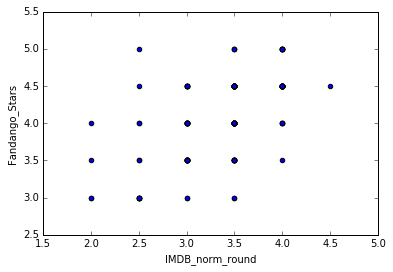

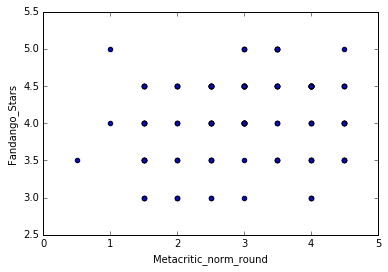

In [33]:
for col_a, col_b in itertools.combinations(cols,2):
    plt.scatter(movies[col_a], movies[col_b])
    plt.xlabel(col_a)
    plt.ylabel(col_b)
    plt.show()

From the r values and plots, it can be observed that fandango ratings always have less correlation with other three ratings. 
The problem seemingly extended from Fandango habit of rounding ratings up to the nearest half thereby .